# Question 1

In [101]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [266]:
# Download historical KO data
ko_data = yf.download(ko_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [267]:
# Calculate monthly log returns for Coca-Cola (KO) stock
ko_data['LogRet'] = np.log(ko_data['Adj Close'] / ko_data['Adj Close'].shift(1))

# Calculate annualized return
monthly_mean_return = ko_data['LogRet'].mean()
annualized_return = (1 + monthly_mean_return) ** 12 - 1

# Print the annualized return for Coca-Cola (KO)
print(f"The annualized return of Coca-Cola (KO) from Jan 2015 to Dec 2019 is {annualized_return:.4f}")


The annualized return of Coca-Cola (KO) from Jan 2015 to Dec 2019 is 0.0042


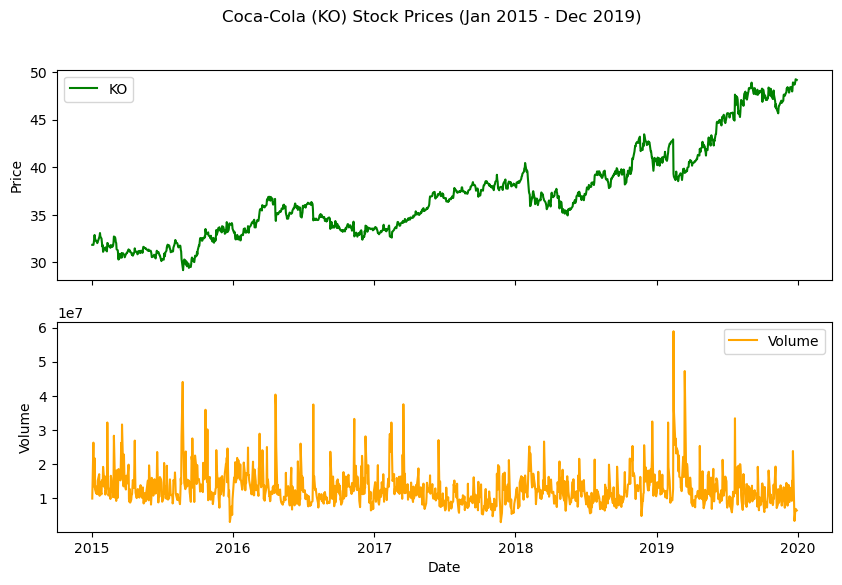

In [268]:
# Create subplots
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 6))
fig.suptitle('Coca-Cola (KO) Stock Prices (Jan 2015 - Dec 2019)')

# Plotting KO Adjusted Close
axs[0].plot(ko_data['Adj Close'], label='KO', color='green')
axs[0].set_ylabel('Price')
axs[0].legend()

# Plotting KO Volume (or any other data you want on the second subplot)
axs[1].plot(ko_data['Volume'], label='Volume', color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()

plt.show()

In [269]:
annualized_volatility = np.std(ko_data['LogRet']) * np.sqrt(12)  # Assuming 12 months in a year

print(f"The annualized volatility of Coca-Cola (KO) from Jan 2015 to Dec 2019 is {annualized_volatility:.4f}")


The annualized volatility of Coca-Cola (KO) from Jan 2015 to Dec 2019 is 0.0310


In [234]:
import yesg


In [190]:
#Import ESG data
ESG = yesg.get_historic_esg('KO')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,73.00,71.00,74.00,74.00
2014-10-01,73.00,65.00,79.00,74.00
2014-11-01,73.00,65.00,79.00,74.00
2014-12-01,73.00,65.00,79.00,74.00
2015-01-01,73.00,65.00,79.00,74.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,22.48,7.88,9.72,4.88
2022-06-01,NaN,NaN,NaN,NaN


In [235]:
start_date = '2015-01-01'
end_date = '2019-12-31'
esg_data = ESG.loc[start_date:end_date]

# Set the date index as a datetime index
esg_data.index = pd.to_datetime(esg_data.index)

In [236]:

# Fill missing values with data from the previous month
esg_data_filled = esg_data.ffill()



In [237]:
print(ESG.head())

            Total-Score  E-Score  S-Score  G-Score
Date                                              
2014-09-01         73.0     71.0     74.0     74.0
2014-10-01         73.0     65.0     79.0     74.0
2014-11-01         73.0     65.0     79.0     74.0
2014-12-01         73.0     65.0     79.0     74.0
2015-01-01         73.0     65.0     79.0     74.0


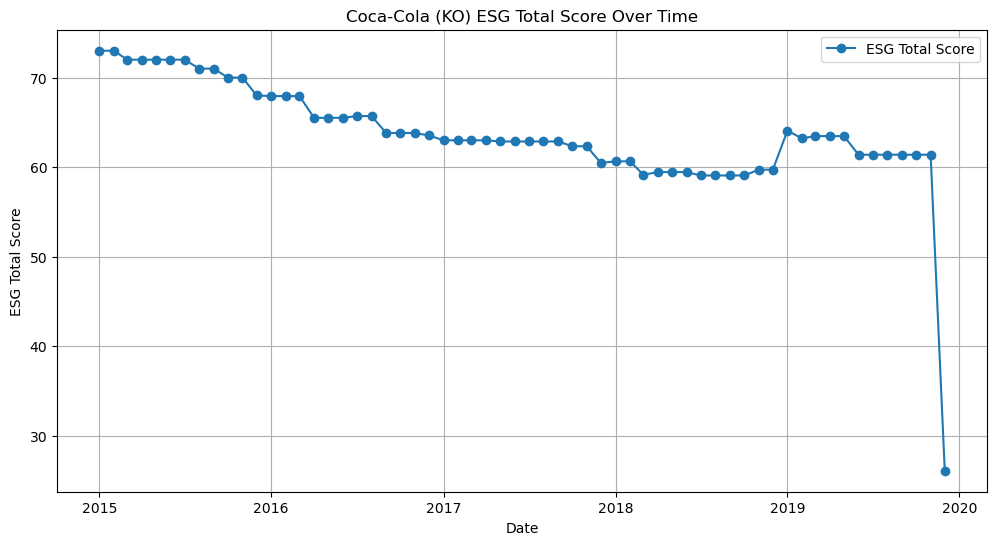

In [239]:
# Plot the figure for Coca-Cola (KO)
plt.figure(figsize=(12, 6))
plt.plot(esg_data_filled.index, esg_data_filled['Total-Score'], label='ESG Total Score', marker='o')
plt.title('Coca-Cola (KO) ESG Total Score Over Time')
plt.xlabel('Date')
plt.ylabel('ESG Total Score')
plt.grid(True)
plt.legend()
plt.show()


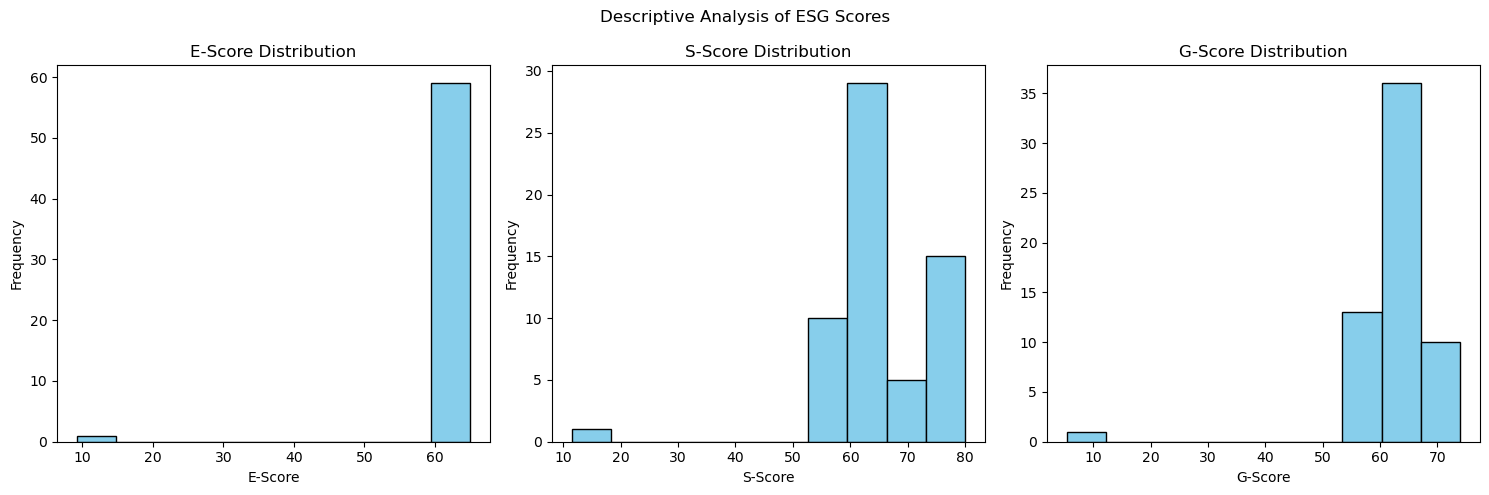

       Total-Score    E-Score    S-Score    G-Score
count    60.000000  60.000000  60.000000  60.000000
mean     63.673667  61.826667  65.671667  61.920333
std       6.475380   7.037074  10.582063   8.792634
min      26.070000   9.210000  11.510000   5.360000
25%      61.380000  62.315000  63.000000  60.350000
50%      62.990000  62.850000  64.550000  61.470000
75%      66.257500  63.500000  71.765000  64.000000
max      73.000000  65.000000  80.000000  74.000000


In [263]:
# Calculate summary statistics
summary_stats = esg_data.describe()

# Plot histograms for each ESG factor
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Descriptive Analysis of ESG Scores')

for i, column in enumerate(['E-Score', 'S-Score', 'G-Score']):
    ax = axes[i]
    ax.hist(esg_data[column], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics
print(summary_stats)

In [262]:

# Calculate the correlation between the stock price and ESG Total Score for Coca-Cola (KO)
correlation = ko_data['Adj Close'].corr(esg_data_filled['Total-Score'])

# Print the correlation coefficient
print(f'Correlation Coefficient between Coca-Cola (KO) Stock Price and ESG Total Score: {correlation:.4f}')

Correlation Coefficient between Coca-Cola (KO) Stock Price and ESG Total Score: -0.6705


## Question 2

In [244]:
from datetime import datetime
from meteostat import Point, Daily

In [245]:
#Month of July is my birthday
start = datetime(2022, 7, 1)
end = datetime(2022, 8, 1)

In [246]:
#Birthplace is wettingen, swizerland
location = Point(47.4701, 8.2765, 35)

In [247]:
# Find daily data
data = Daily(location, start, end)
data = data.fetch()

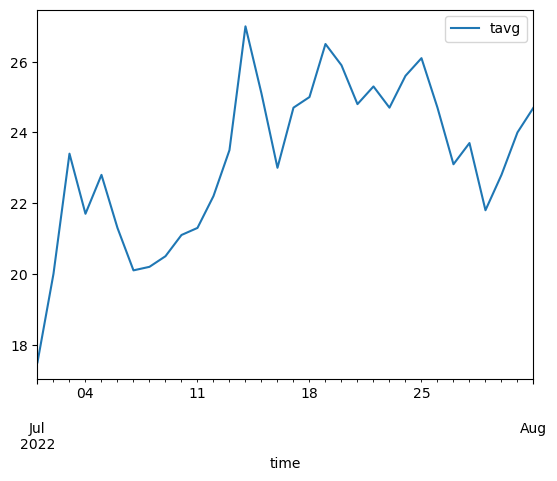

In [248]:
# Plotting average daily temperature data
data.plot(y=['tavg'])
plt.show()

In [249]:
# Exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2022-07-01 to 2022-08-01
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    32 non-null     float64
 1   tmin    32 non-null     float64
 2   tmax    32 non-null     float64
 3   prcp    32 non-null     float64
 4   snow    0 non-null      float64
 5   wdir    32 non-null     float64
 6   wspd    32 non-null     float64
 7   wpgt    32 non-null     float64
 8   pres    32 non-null     float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 2.8 KB


In [250]:
#Counting the Average Temperature Entries 
len(data['tavg'])

32

In [251]:
#Preprocessing the Data - any missing values in the 'tavg' column are filled using a forward-fill method
data['tavg'].fillna(method='ffill', inplace=True)


In [252]:
T_base = 18  # Base temperature in degrees Celsius

# Calculate Cooling Degree Days (CDD) using the daily average temperature ('tavg')
cdds = [max(temp - T_base, 0) for temp in data['tavg']]

In [253]:
# Print the CDD values
print("Cooling Degree Days (CDD) values:")
for day, cdd in zip(data.index, cdds):
    print(f"{day.date()}: {cdd:.2f} degree-days")

Cooling Degree Days (CDD) values:
2022-07-01: 0.00 degree-days
2022-07-02: 2.00 degree-days
2022-07-03: 5.40 degree-days
2022-07-04: 3.70 degree-days
2022-07-05: 4.80 degree-days
2022-07-06: 3.30 degree-days
2022-07-07: 2.10 degree-days
2022-07-08: 2.20 degree-days
2022-07-09: 2.50 degree-days
2022-07-10: 3.10 degree-days
2022-07-11: 3.30 degree-days
2022-07-12: 4.20 degree-days
2022-07-13: 5.50 degree-days
2022-07-14: 9.00 degree-days
2022-07-15: 7.10 degree-days
2022-07-16: 5.00 degree-days
2022-07-17: 6.70 degree-days
2022-07-18: 7.00 degree-days
2022-07-19: 8.50 degree-days
2022-07-20: 7.90 degree-days
2022-07-21: 6.80 degree-days
2022-07-22: 7.30 degree-days
2022-07-23: 6.70 degree-days
2022-07-24: 7.60 degree-days
2022-07-25: 8.10 degree-days
2022-07-26: 6.70 degree-days
2022-07-27: 5.10 degree-days
2022-07-28: 5.70 degree-days
2022-07-29: 3.80 degree-days
2022-07-30: 4.80 degree-days
2022-07-31: 6.00 degree-days
2022-08-01: 6.70 degree-days


In [254]:
# Calculate the sum of all CDDs
total_cdd = sum(cdds)

# Print the sum of CDDs
print(f"Sum of Cooling Degree Days (CDD): {total_cdd:.2f} degree-days")

Sum of Cooling Degree Days (CDD): 168.60 degree-days


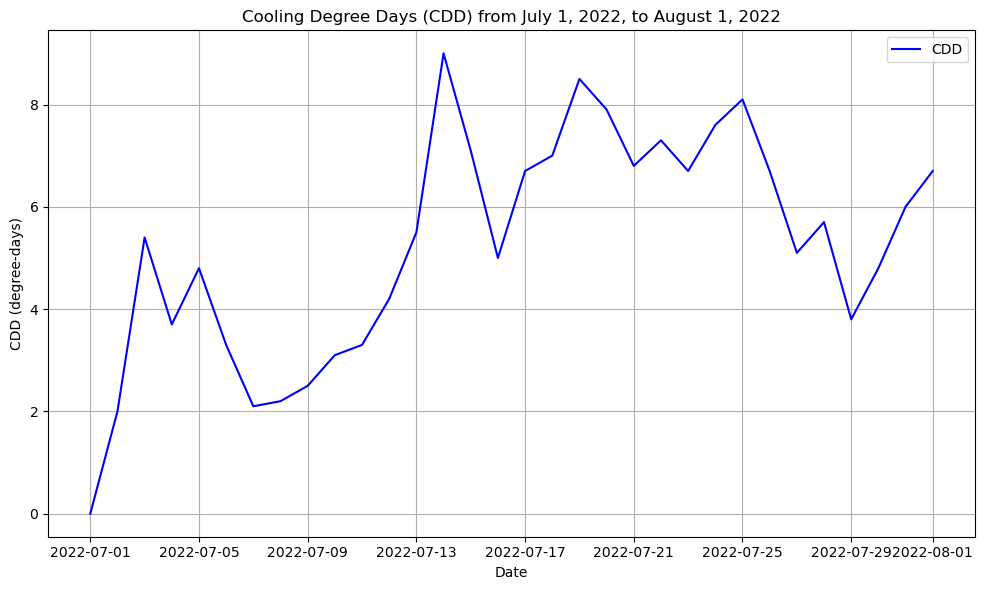

In [255]:
#Graphical representation
plt.figure(figsize=(10, 6))
plt.plot(data.index, cdds, label='CDD', color='blue')  # Change the label to 'CDD'
plt.title('Cooling Degree Days (CDD) from July 1, 2022, to August 1, 2022')  # Change the title
plt.xlabel('Date')
plt.ylabel('CDD (degree-days)')  # Change the y-axis label
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Question 3

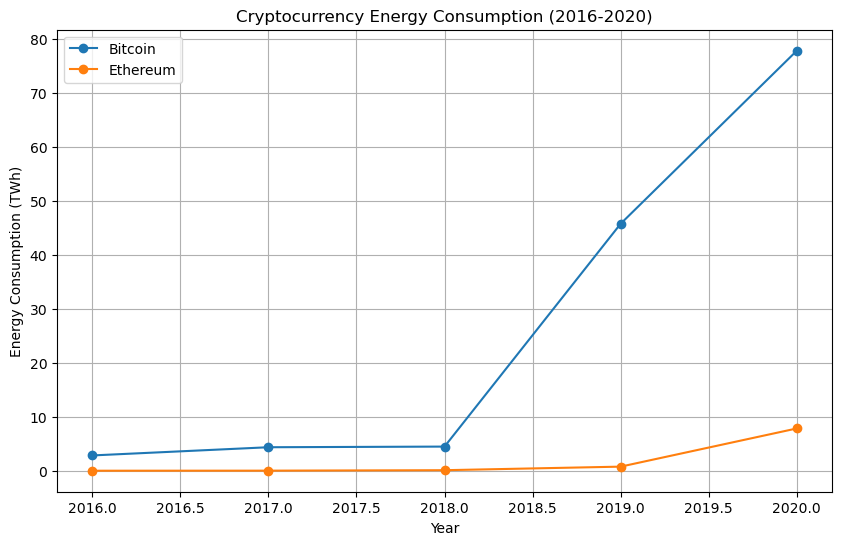

In [256]:
# Sample data (energy consumption in TWh)
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Bitcoin Energy Consumption': [2.83, 4.35, 4.47, 45.74, 77.78],
    'Ethereum Energy Consumption': [0.001, 0.013, 0.097, 0.757, 7.83]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot energy consumption over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Bitcoin Energy Consumption'], label='Bitcoin', marker='o')
plt.plot(df['Year'], df['Ethereum Energy Consumption'], label='Ethereum', marker='o')

plt.title('Cryptocurrency Energy Consumption (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.grid(True)
plt.legend()
plt.show()

In [257]:
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Bitcoin Energy Consumption': [2.83, 4.35, 4.47, 45.74, 77.78],
    'Ethereum Energy Consumption': [0.001, 0.013, 0.097, 0.757, 7.83]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Get descriptive statistics for Bitcoin Energy Consumption
bitcoin_stats = df['Bitcoin Energy Consumption'].describe()

# Get descriptive statistics for Ethereum Energy Consumption
ethereum_stats = df['Ethereum Energy Consumption'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for Bitcoin Energy Consumption:")
print(bitcoin_stats)
print("\nDescriptive Statistics for Ethereum Energy Consumption:")
print(ethereum_stats)

Descriptive Statistics for Bitcoin Energy Consumption:
count     5.000000
mean     27.034000
std      33.669729
min       2.830000
25%       4.350000
50%       4.470000
75%      45.740000
max      77.780000
Name: Bitcoin Energy Consumption, dtype: float64

Descriptive Statistics for Ethereum Energy Consumption:
count    5.000000
mean     1.739600
std      3.419082
min      0.001000
25%      0.013000
50%      0.097000
75%      0.757000
max      7.830000
Name: Ethereum Energy Consumption, dtype: float64


In [258]:
# Find the index of the year 2018
year_2018_index = df[df['Year'] == 2018].index[0]

# Calculate the gradient (slope) for Bitcoin at 2018
btc_energy = df['Bitcoin Energy Consumption']
gradient_btc_2018 = (btc_energy[year_2018_index + 1] - btc_energy[year_2018_index]) / (df['Year'][year_2018_index + 1] - df['Year'][year_2018_index])

# Calculate the gradient (slope) for Ethereum at 2018
eth_energy = df['Ethereum Energy Consumption']
gradient_eth_2018 = (eth_energy[year_2018_index + 1] - eth_energy[year_2018_index]) / (df['Year'][year_2018_index + 1] - df['Year'][year_2018_index])

# Print the gradients
print(f"Gradient (Slope) of Bitcoin Energy Consumption at 2018: {gradient_btc_2018}")
print(f"Gradient (Slope) of Ethereum Energy Consumption at 2018: {gradient_eth_2018}")

Gradient (Slope) of Bitcoin Energy Consumption at 2018: 41.27
Gradient (Slope) of Ethereum Energy Consumption at 2018: 0.66


In [259]:
# Sample data (energy consumption in TWh)
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Bitcoin Energy Consumption': [2.83, 4.35, 4.47, 45.74, 77.78],
    'Ethereum Energy Consumption': [0.001, 0.013, 0.097, 0.757, 7.83]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Filter the DataFrame to select data for 2018 and 2020
bitcoin_2018 = df.loc[df['Year'] == 2018, 'Bitcoin Energy Consumption'].values[0]
bitcoin_2020 = df.loc[df['Year'] == 2020, 'Bitcoin Energy Consumption'].values[0]

ethereum_2018 = df.loc[df['Year'] == 2018, 'Ethereum Energy Consumption'].values[0]
ethereum_2020 = df.loc[df['Year'] == 2020, 'Ethereum Energy Consumption'].values[0]

# Calculate the difference in energy consumption
bitcoin_difference = bitcoin_2020 - bitcoin_2018
ethereum_difference = ethereum_2020 - ethereum_2018

print(f"Difference in Bitcoin Energy Consumption (2018 to 2020): {bitcoin_difference} TWh")
print(f"Difference in Ethereum Energy Consumption (2018 to 2020): {ethereum_difference} TWh")

Difference in Bitcoin Energy Consumption (2018 to 2020): 73.31 TWh
Difference in Ethereum Energy Consumption (2018 to 2020): 7.733 TWh
